# 1.0 Preprocesamiento

En este notebook voy a desarrollar y probar las funciones de preprocesamiento
para el dataset CTG (Cardiotocography):

- Carga de datos
- Revisión de nulos y tipos de dato
- Eliminación de columnas con muchos nulos
- Imputación de valores faltantes
- Tratamiento de outliers (IQR)
- Resumen de completitud por columna

### 1.1 Carga de Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### 1.2 Ruta CSV

In [3]:
ruta = "CTG.csv"
df = pd.read_csv(ruta)

### 1.3 EDA (Exploratory Data Analysis)

In [4]:
print("\n Forma del dataset:")
df.shape


 Forma del dataset:


(2129, 40)

In [5]:
print("\n Información inicial del dataset:")
df.info()


 Información inicial del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64


In [6]:
print("\n Conociendo un poco nuestro dataset:")
df.head()


 Conociendo un poco nuestro dataset:


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [7]:
print("\nConteo de valores nulos por columna:")
print(df.isna().sum().sort_values(ascending=False))


Conteo de valores nulos por columna:
FileName    3
Date        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
Nmax        3
Max         3
Min         3
Width       3
SegFile     3
b           3
e           3
LBE         3
LB          3
AC          3
NSP         3
MSTV        2
UC          2
FM          2
ALTV        2
MLTV        2
ASTV        2
DL          1
DS          1
DP          1
DR          1
dtype: int64


### 1.4 Eliminar columnas con más del 20% de valores nulos

In [8]:
# Veremos las columnas que cumplen con más del 20% de valores nulos
null_ratio = df.isna().mean()
null_ratio

FileName    0.001409
Date        0.001409
SegFile     0.001409
b           0.001409
e           0.001409
LBE         0.001409
LB          0.001409
AC          0.001409
FM          0.000939
UC          0.000939
ASTV        0.000939
MSTV        0.000939
ALTV        0.000939
MLTV        0.000939
DL          0.000470
DS          0.000470
DP          0.000470
DR          0.000470
Width       0.001409
Min         0.001409
Max         0.001409
Nmax        0.001409
Nzeros      0.001409
Mode        0.001409
Mean        0.001409
Median      0.001409
Variance    0.001409
Tendency    0.001409
A           0.001409
B           0.001409
C           0.001409
D           0.001409
E           0.001409
AD          0.001409
DE          0.001409
LD          0.001409
FS          0.001409
SUSP        0.001409
CLASS       0.001409
NSP         0.001409
dtype: float64

In [9]:
#Confirmamos que no hay ninguna columna que cumpla con el requisito
porcent = 0.2
cols_to_drop = null_ratio[ null_ratio > porcent ].index
cols_to_drop

Index([], dtype='object')

In [10]:
#A pesar de no encontrar valores nulos, realizaremos una función para mostrar lo que se hubiera realizado
def drop_null_columns(df, porcent=0.2):
    """
    La función elimina columnas que tengan una proporción de valores nulos mayor al umbral (porcent).

    Parámetros:
        df: DataFrame de entrada.
        porcent: Proporción de nulos permitida (0.2 = 20%).

    Regresa:
        DataFrame sin las columnas que superan el umbral de nulos.
    """
    # 1. Calculamos la proporción de nulos por columna
    null_ratio = df.isna().mean()

    # 2. Identificamos las columnas cuya proporción de nulos es mayor al porcent
    cols_to_drop = null_ratio[null_ratio > porcent].index

    # 3. Mostramos qué columnas se van a eliminar
    print("Columnas a eliminar por alto porcentaje de nulos:")
    print(list(cols_to_drop))

    # 4. Creamos un nuevo DataFrame sin esas columnas
    df_clean = df.drop(columns=cols_to_drop)

    # 5. Regresamos el DataFrame limpio
    return df_clean

In [11]:
#Como se puede observar, no hubo un cambio en nuestro df, por lo que queda de la misma manera
df_no_nulls = drop_null_columns(df, porcent=0.2)

df.shape, df_no_nulls.shape

Columnas a eliminar por alto porcentaje de nulos:
[]


((2129, 40), (2129, 40))

### 1.5 Imputar valores faltantes restantes con métodos adecuados:

In [12]:
#Nuevamente, vamos a revisar cuántos nulos tenemos 
print("Conteo de nulos por columna:\n")
print(df_no_nulls.isna().sum())

Conteo de nulos por columna:

FileName    3
Date        3
SegFile     3
b           3
e           3
LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64


In [13]:
#Ahora haremos una función para imputar, tomando en cuenta que la Media / Mediana son para numéricos y Moda para categóricos
def simple_imputer(df, numeric_strategy="median", categorical_strategy="most_frequent"):
    """
    Imputa valores faltantes usando SimpleImputer de sklearn.

    - Para columnas numéricas: usa media o mediana.
    - Para columnas categóricas: usa la moda (most_frequent).

    Parámetros:
        df: DataFrame de entrada.
        numeric_strategy: 'mean' o 'median'.
        categorical_strategy: 'most_frequent' (moda).

    Regresa:
        df_imputed: DataFrame sin valores faltantes.
    """
    
    # 1. Copiamos el DataFrame para no modificar el original
    df_imputado = df.copy()

    # 2. Identificamos columnas numéricas y categóricas automáticamente
    num_cols = df_imputado.select_dtypes(include=["number"]).columns
    cat_cols = df_imputado.select_dtypes(exclude=["number"]).columns

    # 3. Imputador para columnas numéricas
    if len(num_cols) > 0:
        imputer_num = SimpleImputer(strategy=numeric_strategy)
        df_imputado[num_cols] = imputer_num.fit_transform(df_imputado[num_cols])

    # 4. Imputador para columnas categóricas
    if len(cat_cols) > 0:
        imputer_cat = SimpleImputer(strategy=categorical_strategy)
        df_imputado[cat_cols] = imputer_cat.fit_transform(df_imputado[cat_cols])

    return df_imputado

In [14]:
df_imputado = simple_imputer(df_no_nulls)

In [15]:
print("\nConteo de nulos después de la imputación:")
print(df_imputado.isnull().sum())
print("¡Valores nulos limpiados!")


Conteo de nulos después de la imputación:
FileName    0
Date        0
SegFile     0
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64
¡Valores nulos limpiados!


### 1.6 Detectar y tratar valores atípicos (outliers) con IQR o z-score

In [16]:
#Haremos una función para detectar y tratar valores atípicos
def remove_outliers_iqr(df, cols, factor=1.5):
    """
    Elimina outliers del DataFrame usando el método IQR
    en las columnas indicadas.

    Parámetros:
        df: DataFrame de entrada.
        cols: lista de nombres de columnas numéricas a revisar.
        factor: multiplicador del IQR (1.5).

    Regresa:
        df_filtrado: DataFrame sin las filas que contienen outliers
                     en las columnas seleccionadas.
    """

    # 1. Copiamos el DataFrame para no modificar el original
    df_filtrado = df.copy()

    # 2. Recorremos cada columna indicada en 'cols'
    for col in cols:
        serie = df_filtrado[col]

        # 2.1. Si la columna no es numérica, la saltamos
        if not pd.api.types.is_numeric_dtype(serie):
            print(f"\n La columna '{col}' no es numérica. Se omite en IQR.")
            continue

        # 2.2. Calculamos Q1 (25%), Q3 (75%) e IQR
        Q1 = serie.quantile(0.25)
        Q3 = serie.quantile(0.75)
        IQR = Q3 - Q1

        # 2.3. Calculamos los límites inferior y superior
        limite_inferior = Q1 - factor * IQR
        limite_superior = Q3 + factor * IQR

        # 2.4. Creamos una máscara para los valores que SÍ están dentro de los límites
        mask = (serie >= limite_inferior) & (serie <= limite_superior)

        # 2.5. Guardamos tamaño antes y después para imprimir como el profe
        tam_antes = len(df_filtrado)
        df_filtrado = df_filtrado[mask]
        tam_despues = len(df_filtrado)
        outliers_eliminados = tam_antes - tam_despues

        print(f"---Detectando outliers con IQR en '{col}'---")
        print(f"Límites de IQR para {col}: ({limite_inferior:.2f}, {limite_superior:.2f})")
        print(f"Tamaño antes: {tam_antes}, Tamaño después: {tam_despues}")
        print(f"Outliers eliminados en '{col}': {outliers_eliminados}")

    # 3. Regresamos el DataFrame filtrado
    return df_filtrado

In [17]:
#Seleccionar columnas numéricas relevantes para revisar outliers (IQR)
columnas_outliers = ["LB", "ASTV", "ALTV", "MSTV", "MLTV", "Width", "Min", "Max", "Mean", "Median", "Variance"]

print("Columnas que usaremos para detección de outliers (IQR):")
print(columnas_outliers)

Columnas que usaremos para detección de outliers (IQR):
['LB', 'ASTV', 'ALTV', 'MSTV', 'MLTV', 'Width', 'Min', 'Max', 'Mean', 'Median', 'Variance']


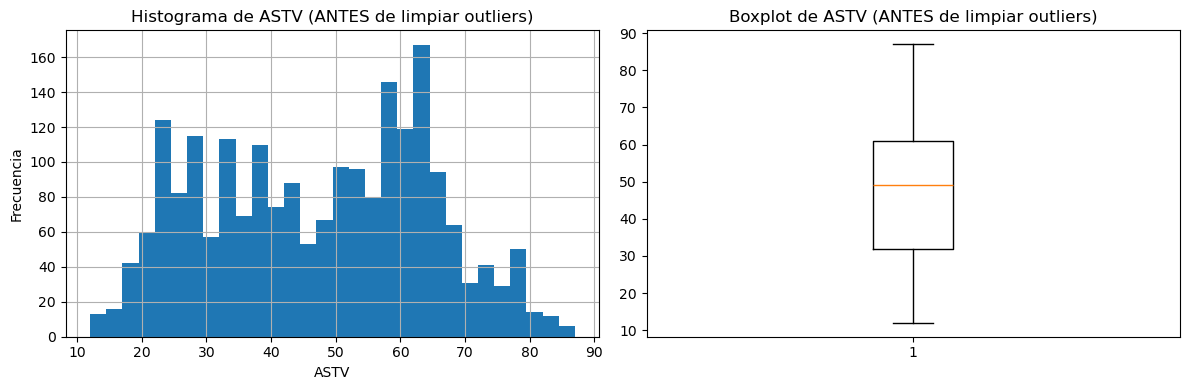

In [18]:
# Inspección visual de outliers para una variable, en este caso usaremos: ASTV
col = "ASTV"

plt.figure(figsize=(12, 4))

# Histograma
plt.subplot(1, 2, 1)
df_imputado[col].hist(bins=30)
plt.title(f"Histograma de {col} (ANTES de limpiar outliers)")
plt.xlabel(col)
plt.ylabel("Frecuencia")

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df_imputado[col])
plt.title(f"Boxplot de {col} (ANTES de limpiar outliers)")

plt.tight_layout()
plt.show()

In [19]:
#Aplicar la función de IQR a las columnas seleccionadas
df_sin_outliers = remove_outliers_iqr(df_imputado, cols=columnas_outliers, factor=1.5)

print("\nShape ANTES de eliminar outliers:", df_imputado.shape)
print("\nShape DESPUÉS de eliminar outliers:", df_sin_outliers.shape)

---Detectando outliers con IQR en 'LB'---
Límites de IQR para LB: (105.00, 161.00)
Tamaño antes: 2129, Tamaño después: 2129
Outliers eliminados en 'LB': 0
---Detectando outliers con IQR en 'ASTV'---
Límites de IQR para ASTV: (-11.50, 104.50)
Tamaño antes: 2129, Tamaño después: 2129
Outliers eliminados en 'ASTV': 0
---Detectando outliers con IQR en 'ALTV'---
Límites de IQR para ALTV: (-16.50, 27.50)
Tamaño antes: 2129, Tamaño después: 1819
Outliers eliminados en 'ALTV': 310
---Detectando outliers con IQR en 'MSTV'---
Límites de IQR para MSTV: (-0.60, 3.40)
Tamaño antes: 1819, Tamaño después: 1756
Outliers eliminados en 'MSTV': 63
---Detectando outliers con IQR en 'MLTV'---
Límites de IQR para MLTV: (-5.10, 21.30)
Tamaño antes: 1756, Tamaño después: 1711
Outliers eliminados en 'MLTV': 45
---Detectando outliers con IQR en 'Width'---
Límites de IQR para Width: (-44.00, 188.00)
Tamaño antes: 1711, Tamaño después: 1711
Outliers eliminados en 'Width': 0
---Detectando outliers con IQR en 'Min'

In [20]:
#En la siguiente función, se verá el antes y después de limpiar los outliers de las tres variables con más cambio
def plot_before_after(df_before, df_after, col, bins=30):
    """
    Grafica la distribución y boxplot de una variable antes y después
    del tratamiento de outliers.

    Parámetros:
        df_before : DataFrame original (antes de limpiar outliers)
        df_after  : DataFrame filtrado (después de limpiar outliers)
        col       : nombre de la columna a graficar
        bins      : número de bins para el histograma
    """

    plt.figure(figsize=(14, 8))

    # 1. Histograma ANTES
    plt.subplot(2, 2, 1)
    df_before[col].hist(bins=bins)
    plt.title(f"Histograma de {col} - ANTES")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

    # 2. Boxplot ANTES
    plt.subplot(2, 2, 2)
    plt.boxplot(df_before[col])
    plt.title(f"Boxplot de {col} - ANTES")

    # 3. Histograma DESPUÉS
    plt.subplot(2, 2, 3)
    df_after[col].hist(bins=bins)
    plt.title(f"Histograma de {col} - DESPUÉS")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

    # 4. Boxplot DESPUÉS
    plt.subplot(2, 2, 4)
    plt.boxplot(df_after[col])
    plt.title(f"Boxplot de {col} - DESPUÉS")

    plt.tight_layout()
    plt.show()

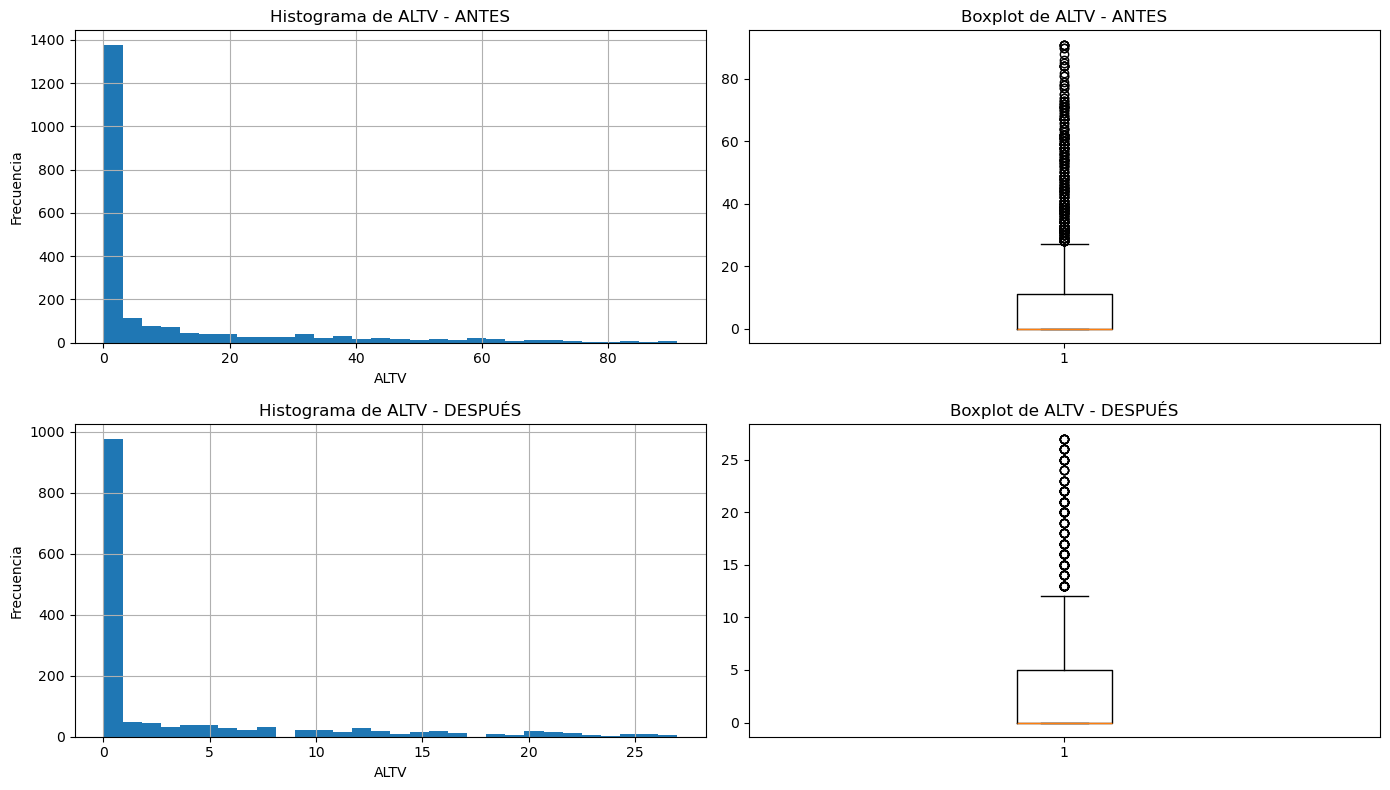

In [24]:
#ALTV: Percentage of time with abnormal long term variability (SisPorto)
plot_before_after(df_imputado, df_sin_outliers, "ALTV")

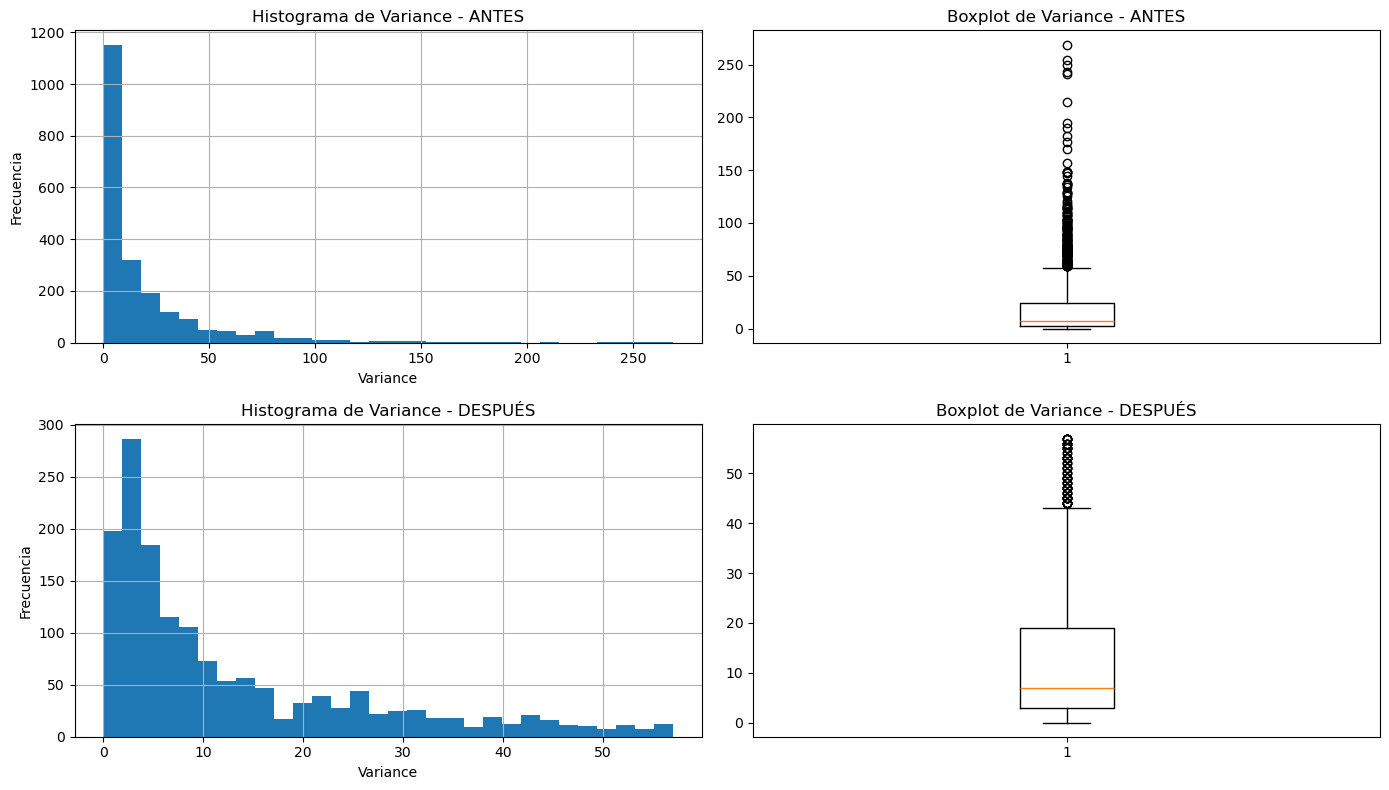

In [25]:
#Variance: Histogram variance
plot_before_after(df_imputado, df_sin_outliers, "Variance")

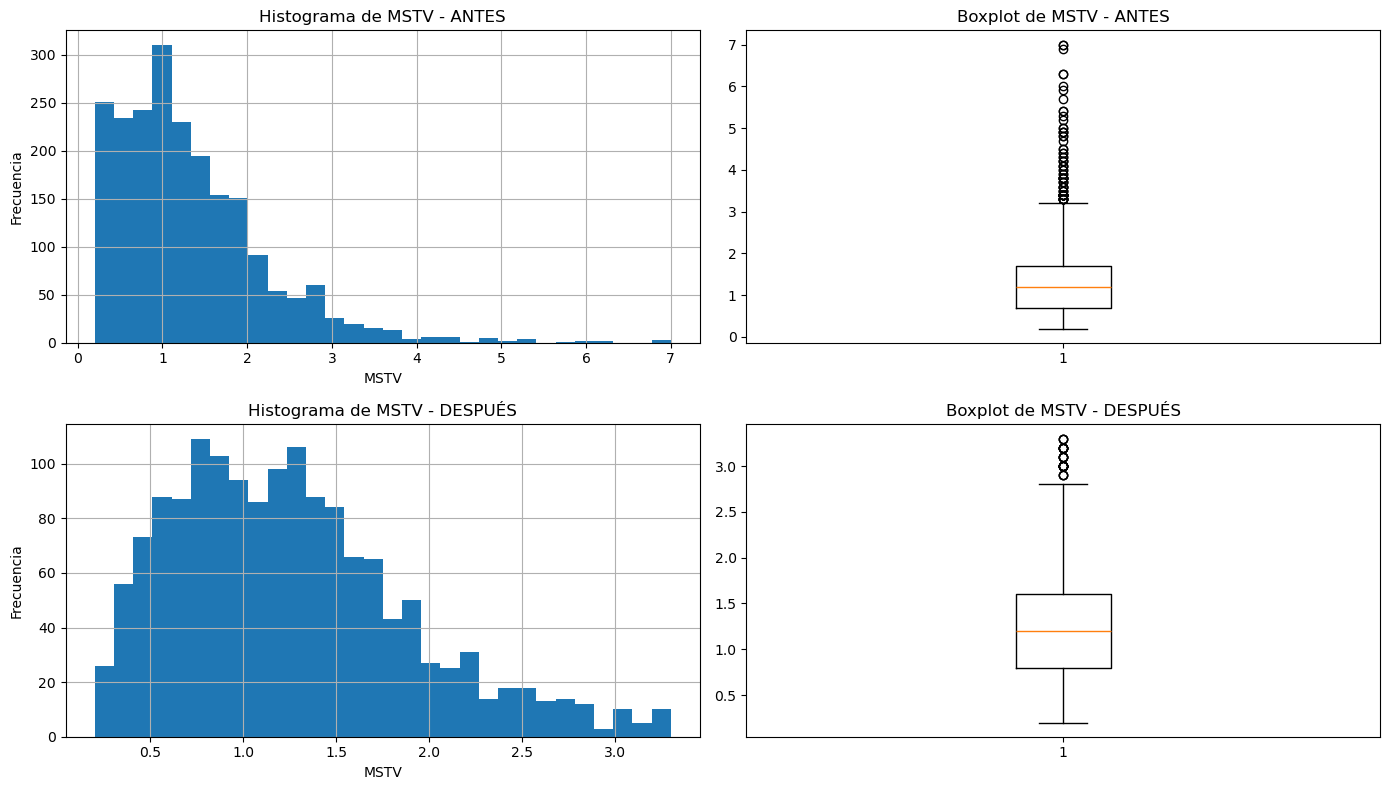

In [26]:
#MSTV: Mean value of short term variability (SisPorto)
plot_before_after(df_imputado, df_sin_outliers, "MSTV")